In [1]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Get the first uploaded file name
filename = list(uploaded.keys())[0]

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(filename)

# Display the DataFrame
df.head()

Saving Tweets.csv to Tweets.csv


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
num_rows = df.shape[0]
num_rows

14640

In [3]:
# Delete any row that is Neutral
df = df[df['airline_sentiment'] != 'neutral']
num_rows = df.shape[0]
num_rows

11541

In [4]:

# converting negative to 1 and positive to 0
df.loc[df['airline_sentiment'] == 'negative', 'airline_sentiment'] = 1
df.loc[df['airline_sentiment'] == 'positive', 'airline_sentiment'] = 0


In [5]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,0,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,1,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,0,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,569587705937600512,1,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,1,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,0,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,1,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN


In [6]:
import re

# Deleting usernames, hashtags, emojis, and URLs

# Define a regex pattern to match words starting with '@' or '#', emojis, or URLs
pattern = r'@\w+|#\w+|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+|http\S+'

# Apply the regex pattern and replace the matched words with an empty string
df['text'] = df['text'].str.replace(pattern, '', regex=True)


<ipython-input-6-938150e881e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.replace(pattern, '', regex=True)


In [7]:
# Deleting all characters except for English alphabet characters

# Define a regex pattern to match non-alphabetic characters
pattern = r'[^a-zA-Z\s]+'

# Apply the regex pattern and replace non-alphabetic characters with an empty string
df['text'] = df['text'].str.replace(pattern, '', regex=True)


<ipython-input-7-38f662392fbe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.replace(pattern, '', regex=True)


In [8]:
# Making all characters lowercase

df['text'] = df['text'].str.lower()


<ipython-input-8-79927b85f65a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()


In [9]:
# Delete Stopwords

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['text'] = df['text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,0,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus youve added commercials experience tacky,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,really aggressive blast obnoxious entertainmen...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,1,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,seriously would pay flight seats didnt playing...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,0,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,yes nearly every time fly vx ear worm wont go ...,NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,569587705937600512,1,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,flight cancelled flightled leaving tomorrow mo...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,1,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,right cue delays,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,0,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank got different flight chicago,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,1,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leaving minutes late flight warnings communica...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN


In [11]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Using stemming

stemmer = PorterStemmer()

def apply_stemming(text):
    words = word_tokenize(text)  # Tokenize the text into words
    stemmed_words = [stemmer.stem(word) for word in words]  # Apply stemming to each word
    return ' '.join(stemmed_words)  # Join the stemmed words back into a single string

# Apply the apply_stemming function to the 'text' column
df['text'] = df['text'].apply(apply_stemming)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,0,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plu youv ad commerci experi tacki,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,realli aggress blast obnoxi entertain guest fa...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,realli big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,1,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,serious would pay flight seat didnt play reall...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,0,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,ye nearli everi time fli vx ear worm wont go away,NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,569587705937600512,1,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,flight cancel flightl leav tomorrow morn auto ...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,1,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,right cue delay,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,0,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank got differ flight chicago,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,1,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leav minut late flight warn commun minut late ...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN


In [13]:
# convert to list
detail_list = df['text'].tolist()

print(detail_list)


['plu youv ad commerci experi tacki', 'realli aggress blast obnoxi entertain guest face amp littl recours', 'realli big bad thing', 'serious would pay flight seat didnt play realli bad thing fli va', 'ye nearli everi time fli vx ear worm wont go away', 'well didntbut', 'amaz arriv hour earli your good', 'lt pretti graphic much better minim iconographi', 'great deal alreadi think nd trip amp havent even gone st trip yet p', 'im fli sky u take away travel', 'thank', 'sfopdx schedul still mia', 'excit first cross countri flight lax mco ive heard noth great thing virgin america', 'flew nyc sfo last week couldnt fulli sit seat due two larg gentleman either side help', 'fli', 'know would amazingli awesom bosfll pleas want fli', 'first fare may three time carrier seat avail select', 'love graphic', 'love hipster innov feel good brand', 'guy mess seat reserv seat friend guy gave seat away want free internet', 'statu match program appli three week call email respons', 'happen ur vegan food opti

In [14]:
# Padding

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = detail_list

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Padding the sequences (post-padding)
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

print(padded_sequences)


[[ 429  374  501 ...    0    0    0]
 [  61 2235 1573 ...    0    0    0]
 [  61  331  118 ...    0    0    0]
 ...
 [   2   37  215 ...    0    0    0]
 [ 133   50   39 ...    0    0    0]
 [ 251   47    1 ...    0    0    0]]


In [15]:
labels = df['airline_sentiment'].tolist()

In [16]:
df.iloc[0]['text']

'plu youv ad commerci experi tacki'

In [17]:
def find_max_number(list_of_lists):
    max_number = float('-inf')  # Initialize the maximum number with negative infinity

    # Iterate through each sublist
    for sublist in list_of_lists:
        # Iterate through each element in the sublist
        for number in sublist:
            if number > max_number:
                max_number = number

    return max_number


max_number = find_max_number(padded_sequences)
print(max_number)

7323


In [18]:
from sklearn.model_selection import train_test_split

# Splitting into train and test sets
train_labels, test_labels, train_values, test_values = train_test_split(labels, padded_sequences, test_size=0.2, random_state=42)

# Printing the train and test sets
print("Train labels:", len(train_labels))
print("Test labels:", len(test_labels))
print("Train values:", len(train_values))
print("Test values:", len(test_values))


Train labels: 9232
Test labels: 2309
Train values: 9232
Test values: 2309


In [20]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense
from keras import regularizers


model = Sequential()
vocab_size = max_number

model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_sequence_length))

# Second layer: SpatialDropout1D
model.add(SpatialDropout1D(0.2))  # You can adjust the dropout rate (0.2 in this example)

# Third layer: LSTM
model.add(LSTM(50,kernel_regularizer=regularizers.l2(0.01)))  # Assuming you want an LSTM layer with 50 units

# Fourth layer: Dropout
model.add(Dropout(0.5))  # You can adjust the dropout rate (0.2 in this example)

# Fifth layer: Dense (output layer)
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/5
289/289 [==============================] - 24s 57ms/step - loss: 0.4696 - accuracy: 0.8553 - val_loss: 0.2405 - val_accuracy: 0.9155
Epoch 2/5
289/289 [==============================] - 4s 14ms/step - loss: 0.2014 - accuracy: 0.9301 - val_loss: 0.2558 - val_accuracy: 0.9138
Epoch 3/5
289/289 [==============================] - 4s 13ms/step - loss: 0.1557 - accuracy: 0.9476 - val_loss: 0.2468 - val_accuracy: 0.9056
Epoch 4/5
289/289 [==============================] - 2s 8ms/step - loss: 0.1251 - accuracy: 0.9585 - val_loss: 0.2723 - val_accuracy: 0.9125


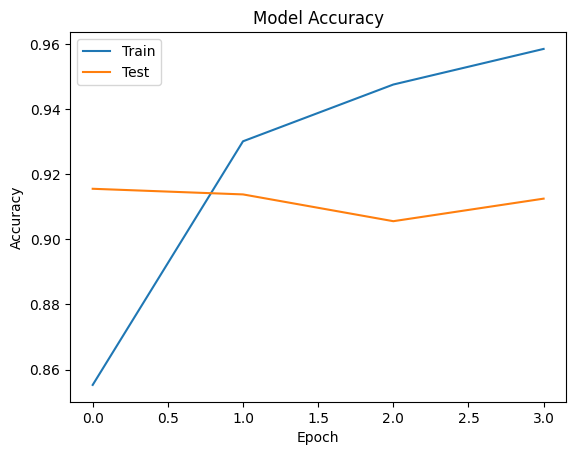

73/73 [==============================] - 1s 2ms/step
Precision: 0.9304979253112033
Recall: 0.9634801288936627
F1-Score: 0.9467018469656993
Confusion Matrix:
 [[ 313  134]
 [  68 1794]]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(patience=3, monitor='val_loss')

X_train = np.array(train_values)
y_train = np.array(train_labels)
X_test = np.array(test_values)
y_test = np.array(test_labels)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping])

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", confusion_mat)